In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D
from keras.layers import MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
from keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [2]:
train_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/train/"
test_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/"
val_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/val/"

In [3]:
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
        
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):
    
    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
test_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
val_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [6]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [7]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((2000,), (251,), (250,))

In [8]:
IMAGE_SIZE = [224, 224]

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
opt = RMSprop(learning_rate=0.001)
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=opt,
  metrics=["accuracy"]
)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [12]:
model.save("C:/Users/atulp/OptimizersBrainStroke/RMSpropSavedModel/modelRMSpropAugmented.h5")

In [12]:
import tensorflow as tf
with tf.device("cpu:0"):
    history = model.fit(
        train_x,
        train_y,
        validation_data=(val_x,val_y),
        epochs=10,
        callbacks=[early_stop],
        batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 175s 3s/step - loss: 1.7727 - accuracy: 0.5705 - val_loss: 1.3946 - val_accuracy: 0.6240
Epoch 2/10
63/63 [==============================] - 168s 3s/step - loss: 1.1033 - accuracy: 0.6665 - val_loss: 1.1800 - val_accuracy: 0.5440
Epoch 3/10
63/63 [==============================] - 169s 3s/step - loss: 0.9129 - accuracy: 0.7030 - val_loss: 0.7202 - val_accuracy: 0.7400
Epoch 4/10
63/63 [==============================] - 170s 3s/step - loss: 0.7927 - accuracy: 0.7520 - val_loss: 1.8315 - val_accuracy: 0.6400
Epoch 5/10
63/63 [==============================] - 168s 3s/step - loss: 0.6289 - accuracy: 0.7960 - val_loss: 0.4838 - val_accuracy: 0.7800
Epoch 6/10
63/63 [==============================] - 169s 3s/step - loss: 0.6033 - accuracy: 0.8060 - val_loss: 0.3869 - val_accuracy: 0.8440
Epoch 7/10
63/63 [==============================] - 167s 3s/step - loss: 0.5491 - accuracy: 0.8365 - val_loss: 0.6195 - val_accuracy: 0.7600
Epoch 8/10
63

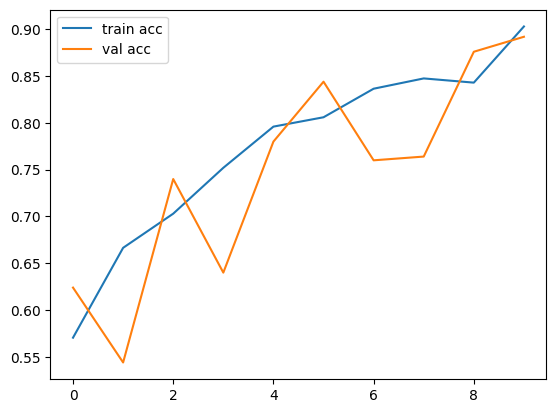

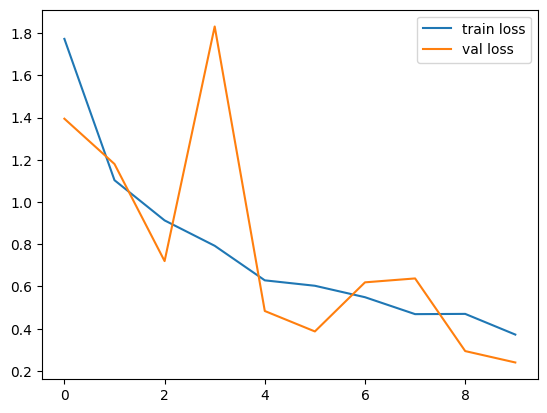

In [13]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('C:/Users/atulp/Downloads/3rd Review Work/PLOTs/RMSPROP PLOT/Training Process/vgg-acc-rps-1.png')

plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('C:/Users/atulp/Downloads/3rd Review Work/PLOTs/RMSPROP PLOT/Training Process/vgg-loss-rps-1.png')
plt.show()

In [14]:
history.history

{'loss': [1.7726891040802002,
  1.1033192873001099,
  0.9128687381744385,
  0.7926672101020813,
  0.628943681716919,
  0.6032871603965759,
  0.5490579605102539,
  0.4688928723335266,
  0.47005391120910645,
  0.3720936179161072],
 'accuracy': [0.5705000162124634,
  0.6664999723434448,
  0.703000009059906,
  0.7519999742507935,
  0.7960000038146973,
  0.8059999942779541,
  0.8364999890327454,
  0.8475000262260437,
  0.8429999947547913,
  0.902999997138977],
 'val_loss': [1.394592046737671,
  1.179980993270874,
  0.720169186592102,
  1.8314648866653442,
  0.48375922441482544,
  0.3869309723377228,
  0.6194973587989807,
  0.6380128264427185,
  0.2938767075538635,
  0.23991498351097107],
 'val_accuracy': [0.6240000128746033,
  0.5440000295639038,
  0.7400000095367432,
  0.6399999856948853,
  0.7799999713897705,
  0.843999981880188,
  0.7599999904632568,
  0.7639999985694885,
  0.8759999871253967,
  0.8920000195503235]}

In [15]:
model.evaluate(test_x,test_y,batch_size=32)

8/8 [==============================] - 14s 563ms/step - loss: 0.2055 - accuracy: 0.9124


[0.20553503930568695, 0.912350594997406]

In [16]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
#print(classification_report(y_pred,test_y))

#get confusion matrix

#print(confusion_matrix(y_pred,test_y))

In [17]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy_score(y_pred,test_y)

0.9123505976095617

In [18]:
recall_score(y_pred,test_y)

0.9101123595505618

In [19]:
precision_score(y_pred,test_y)

0.8526315789473684

In [21]:
f1_score(y_pred,test_y)

0.8804347826086957

(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

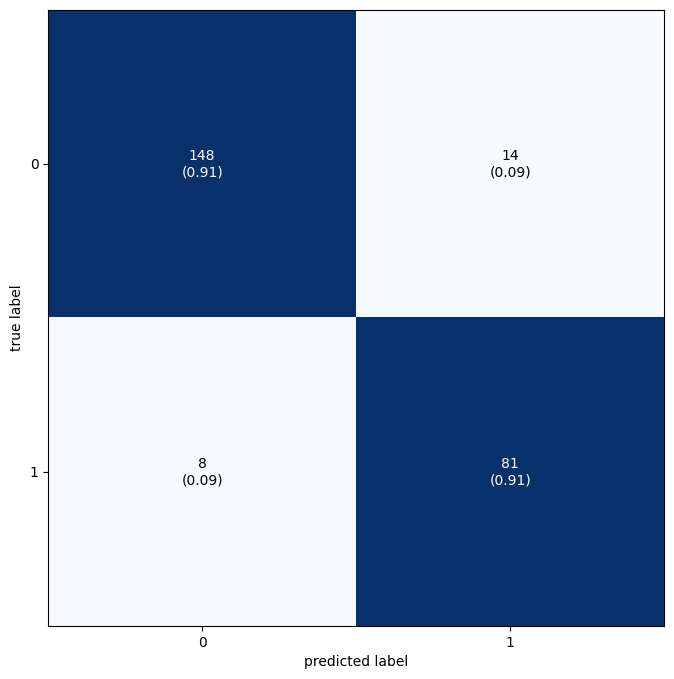

In [22]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred,test_y)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8),show_normed=True)

Normal


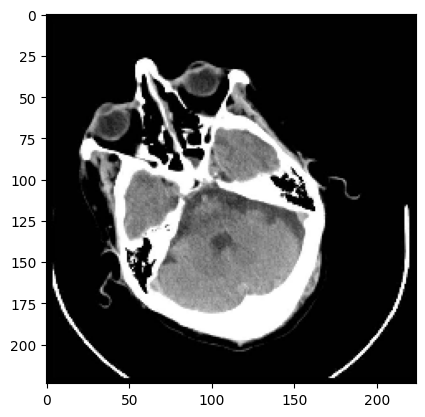

In [23]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
img = image.load_img("C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/Stroke/92 (12).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("C:/Users/atulp/OptimizersBrainStroke/RMSpropSavedModel/modelRMSpropAugmented.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Stroke")
else:
    print('Normal')